In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline

In [2]:
###Load the Cleaned Data
# 1) Point to our cleaned CSV
file_path = '../data/cleaned_data.csv'

# 2) Read into DataFrame
df = pd.read_csv(file_path)

# 3) Quick check
display(df.head())
print(f"Dataset has {len(df)} rows and {len(df.columns)} columns.")

,Unnamed: 0,Transaction_ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,1,24/11/23,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,1,2,27/2/23,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,2,3,13/1/23,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4,5,21/5/23,CUST005,Male,37.0,Clothing,1.0,500.0,500.0
4,5,6,6/5/23,CUST006,Male,30.0,Beauty,2.0,50.0,100.0


Dataset has 1000 rows and 10 columns.


In [3]:
# Define custom age groups manually and preview

import pandas as pd

# 1) Load your cleaned data
df = pd.read_csv('../data/cleaned_data.csv')

# 2) Define the new bins and labels
bins   = [0, 26, 37, 50, 65]                # edges for our age brackets based on the clustering
labels = ['18-26', '26-37', '37-50', '50-65']  # labels

# 3) Create the AgeGroup column
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    right=False     # include left edge, exclude right
)

# 4) Preview the first few assignments
display(df[['Age', 'AgeGroup']].head())

# 5) (Optional) Show how many fall into each bracket
print(df['AgeGroup'].value_counts().sort_index())


,Age,AgeGroup
0,34.0,26-37
1,26.0,26-37
2,50.0,50-65
3,37.0,37-50
4,30.0,26-37


AgeGroup
18-26    169
26-37    220
37-50    275
50-65    336
Name: count, dtype: int64


In [4]:
###Metrics by Age Group
# Group by AgeGroup and calculate key metrics
segmentation = (
    df.groupby('AgeGroup').agg(
        CustomerCount = ('Customer ID', 'nunique'),
        TotalSales    = ('Total Amount', 'sum'),
        AvgQuantity   = ('Quantity', 'mean')
    )
    .reset_index()
)

display(segmentation)

C:\Users\spide\AppData\Local\Temp\ipykernel_13032\4106319921.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup').agg(


,AgeGroup,CustomerCount,TotalSales,AvgQuantity
0,18-26,169,84550.0,2.437870
1,26-37,220,107585.0,2.650000
2,37-50,275,120710.0,2.516364
3,50-65,336,143155.0,2.461310


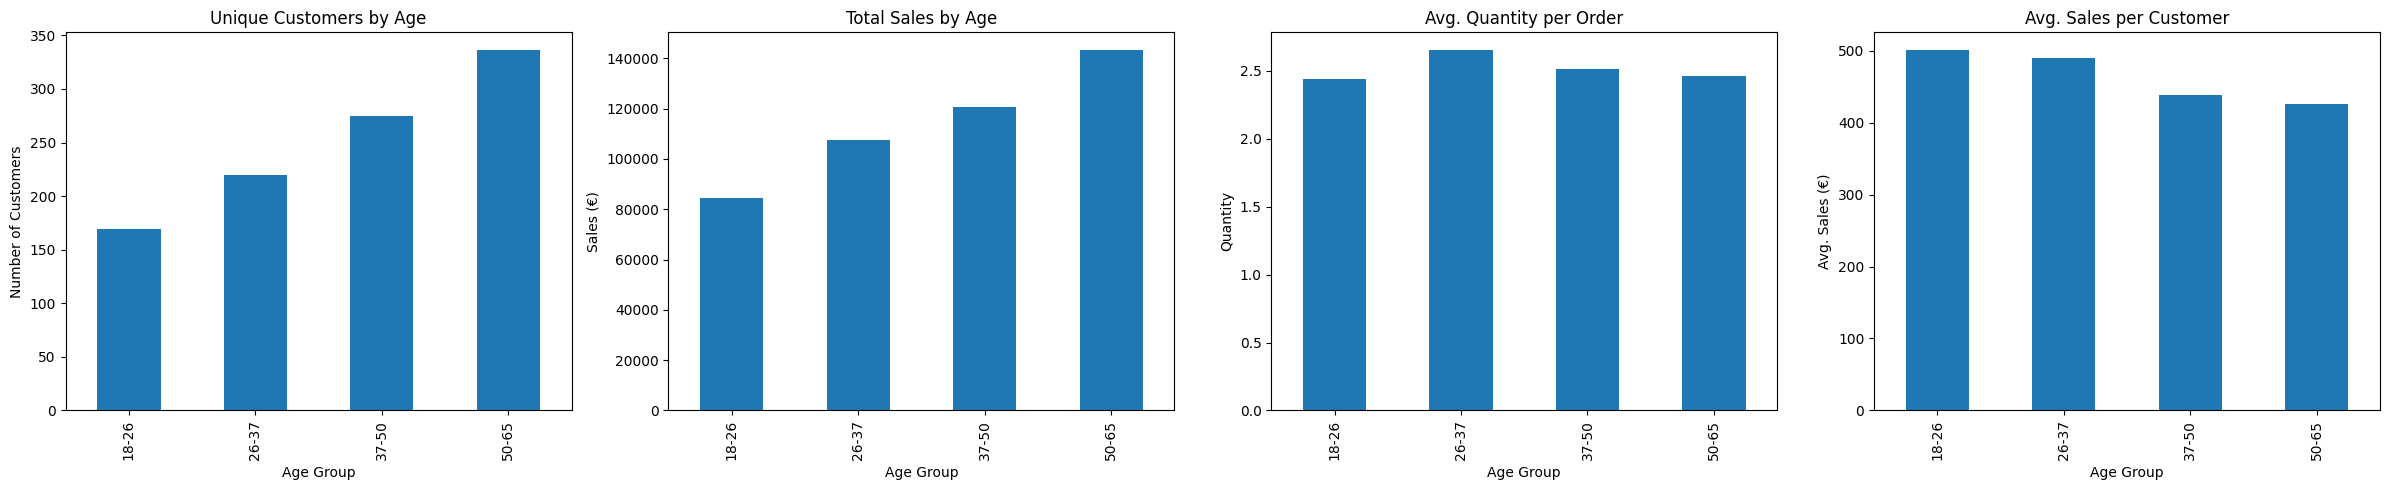

In [5]:
### Segmentation Results

# 1) Compute a new column “AvgSales” = TotalSales / CustomerCount
segmentation['AvgSales'] = segmentation['TotalSales'] / segmentation['CustomerCount']

# 2) Create a 1×4 grid of bar charts
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# 1) Unique customers by age group
segmentation.plot.bar(
    x='AgeGroup', y='CustomerCount', ax=axes[0], legend=False
)
axes[0].set_title('Unique Customers by Age')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Customers')

# 2) Total sales by age group
segmentation.plot.bar(
    x='AgeGroup', y='TotalSales', ax=axes[1], legend=False
)
axes[1].set_title('Total Sales by Age')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Sales (€)')

# 3) Average quantity per order
segmentation.plot.bar(
    x='AgeGroup', y='AvgQuantity', ax=axes[2], legend=False
)
axes[2].set_title('Avg. Quantity per Order')
axes[2].set_xlabel('Age Group')
axes[2].set_ylabel('Quantity')

# 4) Average sales per age group
segmentation.plot.bar(
    x='AgeGroup', y='AvgSales', ax=axes[3], legend=False
)
axes[3].set_title('Avg. Sales per Customer')
axes[3].set_xlabel('Age Group')
axes[3].set_ylabel('Avg. Sales (€)')

plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

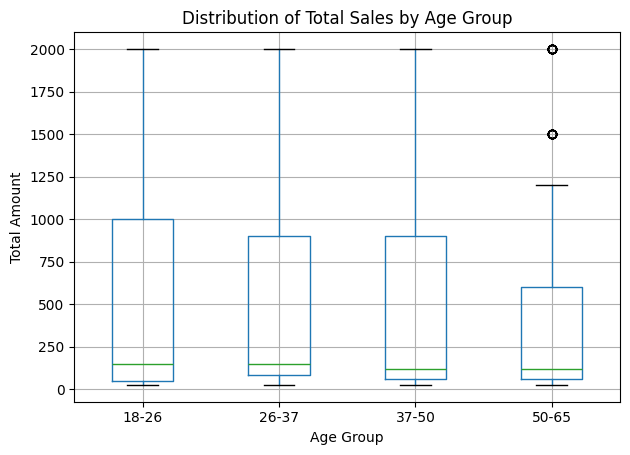

In [6]:
# Box plot to show distribution and outliers of Total Amount per age bracket
plt.figure(figsize=(8, 5))
df.boxplot(column='Total Amount', by='AgeGroup')
plt.title('Distribution of Total Sales by Age Group')
plt.suptitle('')  # remove automatic suptitle
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

In [7]:
###Adding Product Category

# 1) Group by both AgeGroup and Product Category
refined = (
    df.groupby(['AgeGroup', 'Product Category'])
    .agg(
        CustomerCount = ('Customer ID', 'nunique'),
        TotalSales    = ('Total Amount', 'sum'),
        AvgQuantity   = ('Quantity', 'mean')
    )
    .reset_index()
)
display(refined)

C:\Users\spide\AppData\Local\Temp\ipykernel_13032\3216346664.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'Product Category'])


,AgeGroup,Product Category,CustomerCount,TotalSales,AvgQuantity
0,18-26,Beauty,60,31280.0,2.533333
1,18-26,Clothing,51,26510.0,2.529412
2,18-26,Electronics,58,26760.0,2.258621
3,26-37,Beauty,71,34565.0,2.605634
4,26-37,Clothing,80,43185.0,2.587500
5,26-37,Electronics,69,29835.0,2.768116
6,37-50,Beauty,83,43585.0,2.626506
7,37-50,Clothing,101,38815.0,2.574257
8,37-50,Electronics,91,38310.0,2.351648
9,50-65,Beauty,93,34085.0,2.322581


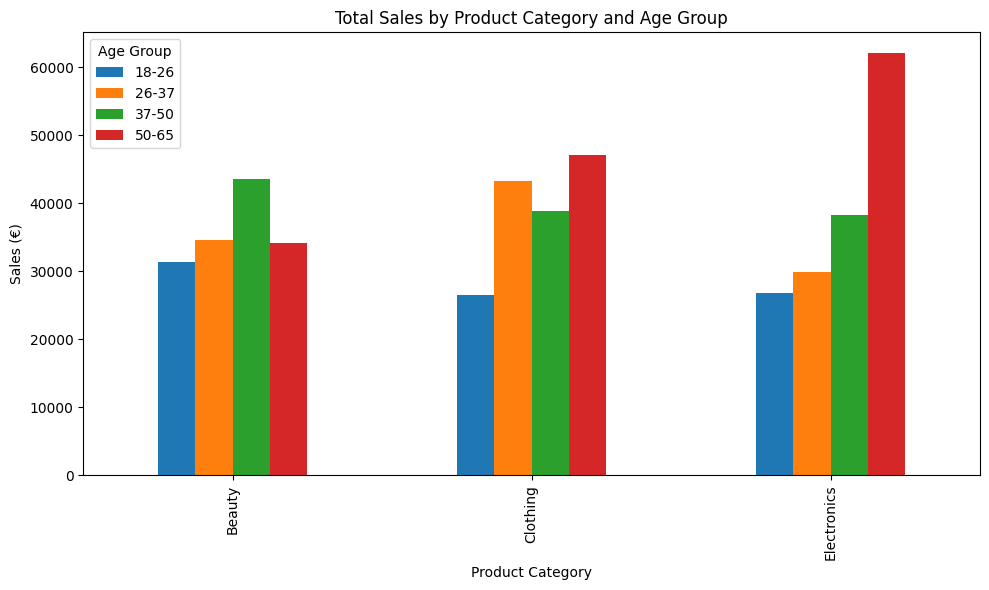

In [8]:
###Total sales by Product category and Age group

# 2) Visualize with a pivot table bar chart
pivot_sales = refined.pivot(index='Product Category', columns='AgeGroup', values='TotalSales')

pivot_sales.plot(
    kind='bar',
    figsize=(10, 6)
)
plt.title('Total Sales by Product Category and Age Group')
plt.xlabel('Product Category')
plt.ylabel('Sales (€)')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [9]:
# Save the refined segmentation to CSV
refined.to_csv('../data/segmentation_by_age_and_category.csv', index=False)
print('Saved refined segmentation to segmentation_by_age_and_category.csv')

Saved refined segmentation to segmentation_by_age_and_category.csv


boxplot productxsalesxage group